In [1]:
#sklearnをつかった機械学習をおこなう

from sklearn import datasets
import numpy as np
import pandas as pd

#iris dataset
iris  = datasets.load_iris()

#3,4列目の特徴量をみる
X = iris.data[:,[2,3]]

#クラスラベルを取得
y = iris.target

#クラスラベルの種類
print(len(np.unique(y)))

3


In [2]:
#特徴量を標準化する
from sklearn.preprocessing import StandardScaler

#StandardScaler
SC = StandardScaler()
SC.fit(X,y)
X_std = SC.transform(X)

#学習とテストデータへの分離
from sklearn.model_selection import train_test_split
#30%をテストデータにする
#と同時に、stratify= target column を指定することで、 train/test　ともに、元データのyの分布比率と同じ
#分布を持たせるようにできる（層化サンプリング）
X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=1,stratify=y)

In [3]:
#訓練
from sklearn.linear_model import Perceptron#単純パーセプトロン（線形）

pp = Perceptron(eta0=0.1,random_state=1,penalty='l2')#eta=0.01,iter=1000(default),regularizetion:l2

#fit
pp.fit(X_train_std,y_train)

#predict
y_pred = pp.predict(X_test_std)

#分類性能は？
print('miss classification : {} / {}'.format(np.sum(y_pred!=y_test),len(y_test)))

miss classification : 3 / 45


In [4]:
#正解率をはかる
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9333333333333333


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


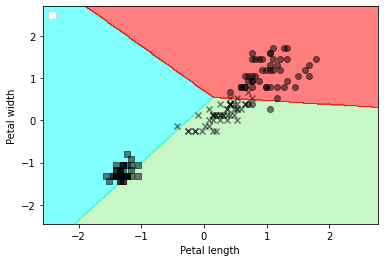

In [5]:
#決定境界を可視化
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_boundary(X,y,clf,resolution=0.02):
    
    #マーカーとカラーマップ準備
    markers = ('s','x','o','^','v')
    colors = ('cyan','lightgreen','red','yellow','black')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロットするために、X1とX2の最大値と最小値をそれぞれだしておく
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    #grid point(x,yの座標軸)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    #各特徴量を1次元配列にしてから予測する
    #np.array(xx1,xx2)だと、ヨコ方向にX1,X2がだーっと並んでいるので
    #転置してあげて、特徴量行列にした上でpredictに投入
    Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #predict結果は、特徴量X1と同じ形状にしておく
    Z = Z.reshape(xx1.shape)
    
    #等高線
    plt.contourf(xx1,xx2,Z,alpha=0.5,cmap=cmap)
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.legend()
    
    for i,cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0],
                    y=X[y == cls, 1],
                    alpha=0.5,
                    c='black',
                    marker=markers[i],
                    edgecolor='black')
    

plot_decision_boundary(X_std,y,pp,resolution=0.02)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')

単純パーセプトロンは、正解と予測の誤差がいつまでたっても０にはならないので、重み更新が終わらない<br>
つまり、線形分離のなかでも精度向上には限度があるよわよわモデル


In [6]:
pp.max_iter
help(pp)

Help on Perceptron in module sklearn.linear_model._perceptron object:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  fit_intercept : bool, default=True
 |      Whether the intercept should be estimated or not. If False, the
 |      data is assumed to be already centered.
 |  
 |  max_iter : int, default=1000
 |      The maximum number of

<AxesSubplot:>

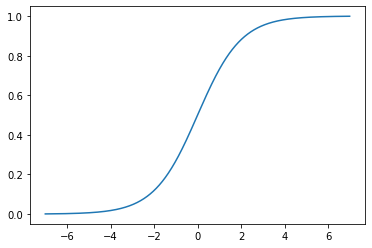

In [7]:
#ロジスティック回帰についておさらい

#まず、ロジット/対数オッズ log(p/(1-p))があり、それが z =w0x0 + w1x1 + w2x2 ... + bの線形結合和で予測できることを前提としている
#ここで求めたいのは、あるデータポイントが、あるラベルに属する確率pである
#これは、ロジット関数の逆関数のシグモイド関数 : 1 / e**-z + 1で求めることができる

#シグモイド関数のプロット
import seaborn as sns

#X
a = np.arange(-7,7,0.01)

#sigmoid関数の定義
def sigmoid(z):
    
    return  1 / (np.exp(-z) + 1)#e**xを計算したい時、np.exp(x)とすればよいだけ

sns.lineplot(x=a,y=sigmoid(a))#sigmoid curve. z=0ならば,sigmoid(z)=0.5であり、
#zが無限大に近づけば、sigmoid(z)は１に近似する。逆にzがマイナス無限大に近づけば、sigmoid(z)は０に近似していく

In [8]:
#ロジスティック回帰を、ADALINEを元に実装する
class LogisticRegressionGD(object):
    
    def __init__(self,eta=0.05,n_iter=100,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        #重みを生成するための乱数発生器
        rgen = np.random.RandomState(self.random_state)
        #乱数に基づく重みの生成
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])#バイアス含めて乱数を重みで初期化
        #コスト(Epochごとの平均コスト)格納用リスト
        self.cost_ = []
        
        #Epoch回数だけ、学習を行う
        for i in range(self.n_iter):
            #線形結合の計算
            net_input = self.net_input(X)
            #活性化関数(sigmoid)を通した結果
            output = self.activation(net_input)
            #推論結果と、実際のラベルの誤差
            error = (y - output)
            
            #ここから重みを更新していく。まずは係数の部分から
            self.w_[1:] += self.eta * X.T.dot(error)#クロエン誤差の微分: δJ/δw = (ypred - ytrue)*X
            
            #バイアスの微分
            self.w_[0] += self.eta * error.sum()#バイアスの微分は、学習率にエラーを行方向に足したものをかける
            
            #コストの計算。更新された重みを元にコストを計算するが、ここで計算するコストはSSEではなく、クロエン誤差である
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            
            #Epochごとのコストを格納
            self.cost_.append(cost)
            
        return self
    
    def net_input(self,X):
        #Affine
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    
    def activation(self,output):
        #シグモイド活性化関数を通す
        return 1 / (1 + np.exp(-np.clip(output, -250, 250)))
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1.0, -1.0)

In [9]:
#datasets
iris_df = pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1).reset_index(drop=True)

iris_df.columns =  ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)',
  'y']

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
X_sub01 = iris_df[iris_df['y'].isin([0,1])].drop(['y','sepal width (cm)','sepal length (cm)'],axis=1).to_numpy()
y_sub01 = iris_df[iris_df['y'].isin([0,1])].y

#Logsitic回帰のインスタンス生成
logreg = LogisticRegressionGD(eta=0.01,n_iter=1000,random_state=1)
logreg.fit(X_sub01,y_sub01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


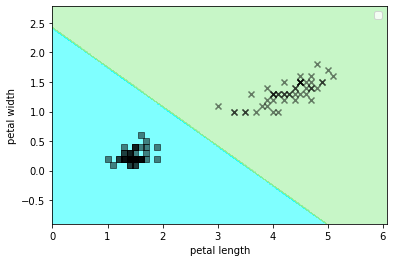

In [11]:
#決定境界のプロット

#決定境界を可視化する
from matplotlib.colors import ListedColormap

#決定境界を可視化する
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X,y,clf,resolution=0.02):
    
    #マーカーとカラーマップ準備
    markers = ('s','x','o','^','v')
    colors = ('cyan','lightgreen','red','yellow','black')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロットするために、X1とX2の最大値と最小値をそれぞれだしておく
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    #grid point(x,yの座標軸)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    #各特徴量を1次元配列にしてから予測する
    #np.array(xx1,xx2)だと、ヨコ方向にX1,X2がだーっと並んでいるので
    #転置してあげて、特徴量行列にした上でpredictに投入
    Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #predict結果は、特徴量X1と同じ形状にしておく
    Z = Z.reshape(xx1.shape)
    
    #等高線
    plt.contourf(xx1,xx2,Z,alpha=0.5,cmap=cmap)
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for i,cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0],
                    y=X[y == cls, 1],
                    alpha=0.5,
                    c='black',
                    marker=markers[i],
                    edgecolor='black')


plot_decision_boundary(X_sub01,y_sub01,logreg)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


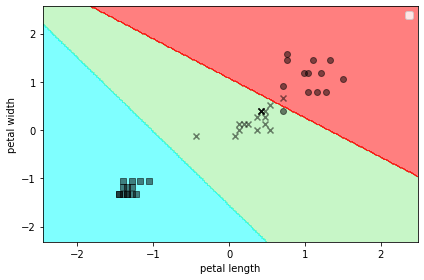

In [12]:
#sklearnを使ったロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=1)

#インスタンス生成
lr = LogisticRegression(C=10,random_state=0,solver='lbfgs')#Cは正則化パラメター.大きければ大きいほど、重みの肥大化に対するペナルティが大きくなる

lr.fit(X_train_std,y_train)

#決定境界
plot_decision_boundary(X_test_std,y_test,lr)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.tight_layout()

In [13]:
#予測器が返す、各データポイントがどのyに所属するのかの確率を確認
lr.predict_proba(X_test_std[:3,:])

array([[9.96085248e-01, 3.91475217e-03, 7.14569429e-12],
       [1.05152249e-01, 8.94707392e-01, 1.40358265e-04],
       [1.23087746e-03, 9.45843152e-01, 5.29259708e-02]])

In [14]:
#３列あるが、これはyのラベルのユニークな種類に対応している
#argmaxで、最も予測確率の高いラベルがなにか？を取得
lr.predict_proba(X_test_std).argmax(axis=1)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int64)

In [15]:
#実際にはpredictを使ったほうが早い
lr.predict(X_test_std)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


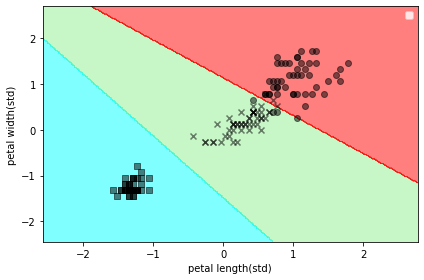

In [16]:
#線形SVC
from sklearn.svm import SVC

#線形SVCのインスタンス生成
svc = SVC(C=0.1,random_state=0,kernel='linear')#線形SVC

#線形SVCにfitさせる
svc.fit(X_train_std,y_train)#SVCにデータ投入する際は、正規化が必須なので気をつけること

#全データ連結
X_ttl = np.vstack((X_train_std,X_test_std))
y_ttl = np.hstack((y_train,y_test))
#決定境界の描画
plot_decision_boundary(X_ttl,y_ttl,svc)
plt.xlabel('petal length(std)')
plt.ylabel('petal width(std)')
plt.legend(loc='upper right')
plt.tight_layout()

一般に、ロジスティック回帰と、線形SVCは分類結果が非常によく似たものになるという特徴がある<br>
ただし、ロジスティック回帰は外れ値の影響をもろに受けるのにたいして、SVCはサポートベクトルのデータ点についての<br>
決定境界との距離の最大化が目的なので、ハズレ値に強い特徴がある

<AxesSubplot:>

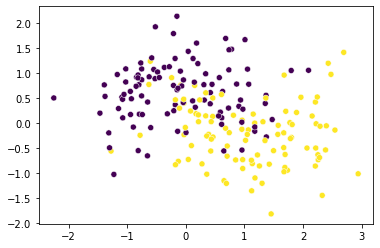

In [17]:
#カーネルSVM
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#線形分離できないデータの代表格 moonデータ
from sklearn.datasets import make_moons

moon = make_moons(n_samples=200,shuffle=True,noise=0.5)

X = moon[0]
y = moon[1]

#plot
sns.scatterplot(x=X[:,0],y=X[:,1],c=moon[1])#どう見ても線形で分離できるデータ分布ではない！

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


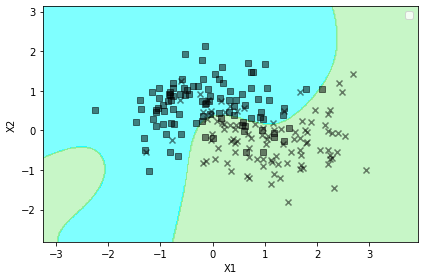

In [18]:
#カーネルSVMを利用して、データポイントの分類を試す
svm = SVC(kernel='rbf',C=10,random_state=1,gamma=0.51)

svm.fit(X,y)

#決定境界の描画
plot_decision_boundary(X,y,svm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


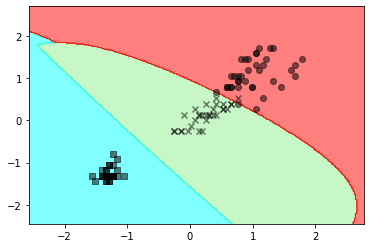

In [19]:
#gammaパラメーターについて
#gammaパラメーターを大きくすると、分類する領域がより凝集したような形になる（密なクラスタになる）
svm2 = SVC(gamma=.2,C=1.0,random_state=0)#gamma=0.2
svm2.fit(X_train_std,y_train)

plot_decision_boundary(X_train_std,y_train,svm2)#gammaパラメーターを小さくすると、決定境界はかなりなめらかになる

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


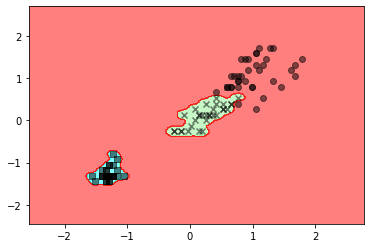

In [20]:
svm3 = SVC(gamma=120,C=1.0,random_state=0)#gamma=0.2
svm3.fit(X_train_std,y_train)

plot_decision_boundary(X_train_std,y_train,svm3)#gammaパラメーターを大きくしすぎると、かなり
#過学習気味の、凝集クラスタのような複雑な決定境界になり、汎化性能が落ちる

Text(0, 0.5, 'inpurity index')

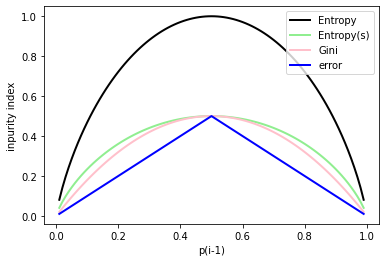

In [21]:
#決定木の枝分岐ロジックに関して、分類誤差、GINI不純度、エントロピーの3つがあり、ジニ不純度が用いられる
import matplotlib.pyplot as plt
import numpy as np

#gini不純度の関数を定義
def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

#Entropyの関数を定義
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

#分類誤差関数
def error(i):
    return 1 - np.max((i,1-i))#ただ単にノードの確率の一番高いクラスのpを、1から引くだけ
    #np.max(配列)で配列の最大値をかえす

#確率を表す配列を生成(0.01-0.99まで0.01刻み)
x = np.arange(0.01,1.00,0.01)

#配列の値を元にエントロピーと分類誤差を計算
#ent = [entropy(p) if p!=0 else None for p in x]
ent = [entropy(p) if p!=0 else NOne for p in x]

#entropyを1/2乗したスケール度バージョン
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig=plt.figure()
ax = plt.subplot(111)

#エントロピー(*2)、ジニ不純度、分類誤差それぞれをloop
for i,lab,ls,c in zip([ent,sc_ent,gini(x),err],['Entropy','Entropy(s)','Gini','error'],['-','-','-','-'],
                   ['black','lightgreen','pink','blue','lightblue']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)
ax.legend(loc='upper right')
plt.xlabel('p(i-1)')
plt.ylabel('inpurity index')

#見てわかる通り、GINI不純度は、枝分かれする際の目的変数として、エントロピーとErrorの真ん中に位置している
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


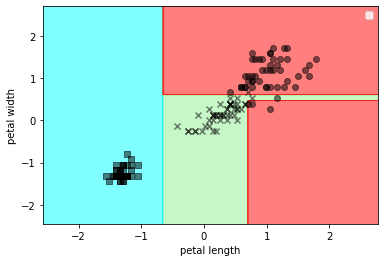

In [22]:
#sklearnで決定木を使う
from sklearn.tree import DecisionTreeClassifier

#ジニ不純度を指標とする決定木インスタンス
TR = DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=12)

#treeモデルをfitさせる
TR.fit(X_train_std,y_train)

#決定境をみる
plot_decision_boundary(X_ttl,y_ttl,TR)#軸に平行な決定境界になる
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

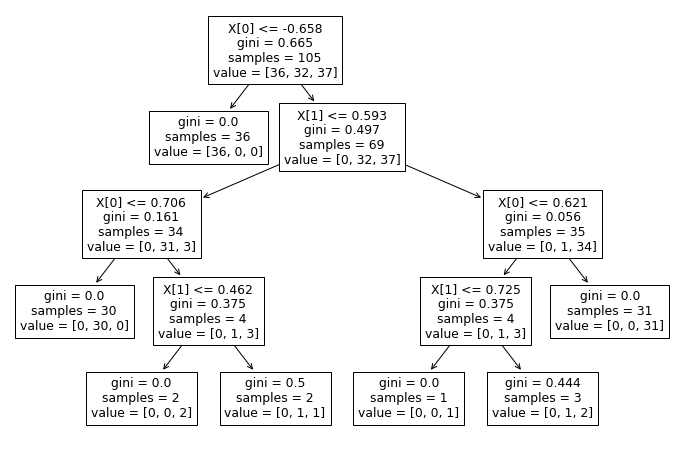

In [23]:
#訓練後の決定木モデルを可視化する
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(TR)
plt.show()

In [24]:
#graphvizでもっと洗練された可視化をためす
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(TR,filled=True,rounded=True,class_names=['Setosa','versicolor','virginica'],
                           feature_names=['pl','pw'],out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('hoge.png')

True

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


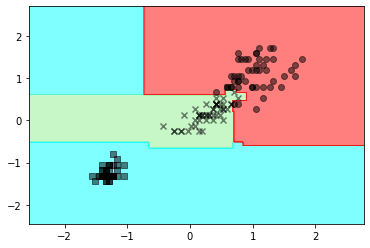

In [25]:
#アンサンブル学習　ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=1,n_jobs=-1)
#RFに関して一言。RFは並列で決定木を構築して、最後にその平均を取るわけで、
#ブースティングのように、個々の決定木の出力結果の誤差を補正する(バギング)、ということはしていないなので、
#n_estimatorsを大きくしすぎても過学習に陥るということはない。（計算は重くなるが）

RFC.fit(X_ttl,y_ttl)
plot_decision_boundary(X_ttl,y_ttl,RFC)
#決定木ベースなので軸に平行ではあるが、より複雑な決定境界を作成することが出来ていることがわかる。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


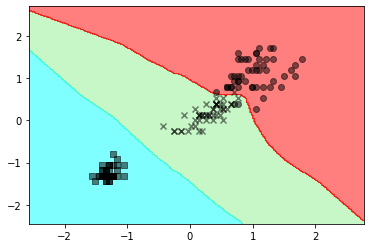

In [35]:
#KNN(K近傍法)-怠惰学習の代表的存在
from sklearn.neighbors import KNeighborsClassifier
#距離指標はユークリッド距離、ある点の周囲5点(距離が最も近い)を
#参照して、多数決取る分類器

#p=2で、ユークリッド距離
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

#fit
knn.fit(X_train_std,y_train)#n次元空間上の点の距離を元に分類を行うので、Xのスケーリングは合わせておくことが必須になる

#決定境界
plot_decision_boundary(X_ttl,y_ttl,knn)#最近傍5点の多数決を取ることで、比較的なめらかな決定境界が獲得できている

一方で、データ数が固定であるのに、次元数が増えていくと、ある次元n上でのデータの分布は極めてまばらになり、<br>
近傍データ点まで遠くなッタ結果、正しく推定できないという次元の呪いが存在する